<a href="https://colab.research.google.com/github/21astroboy/NN-ML/blob/main/NN_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.2 MB/s eta 0:00:00


In [4]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv",index_col = "Person ID")

In [5]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [6]:
df = df.fillna("None")

In [7]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [8]:
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y, shuffle=True)

print("Размер тренировочной выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер тренировочной выборки: (261, 11)
Размер тестовой выборки: (113, 11)


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Размер предобработанной тренировочной выборки:", X_train_processed.shape)
print("Размер предобработанной тестовой выборки:", X_test_processed.shape)


Размер предобработанной тренировочной выборки: (261, 45)
Размер предобработанной тестовой выборки: (113, 45)


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Форма закодированных тренировочных меток:", y_train_encoded.shape)
print("Форма закодированных тестовых меток:", y_test_encoded.shape)


Форма закодированных тренировочных меток: (261,)
Форма закодированных тестовых меток: (113,)


In [13]:
y_train_encoded

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1,
       1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0,
       2, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2,
       2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2])

In [26]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        sample = self.X[idx]
        label = self.y[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, label

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df = df.fillna("None")
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y, shuffle=True)

print("Размер тренировочной выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train).toarray()
X_test_processed = preprocessor.transform(X_test).toarray()

print("Размер предобработанной тренировочной выборки:", X_train_processed.shape)
print("Размер предобработанной тестовой выборки:", X_test_processed.shape)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



train_dataset = CustomDataset(X_train_processed, y_train_encoded)
test_dataset = CustomDataset(X_test_processed, y_test_encoded)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(train_features)
print()
print()
print(train_labels)

Размер тренировочной выборки: (261, 12)
Размер тестовой выборки: (113, 12)
Размер предобработанной тренировочной выборки: (261, 45)
Размер предобработанной тестовой выборки: (113, 45)
Feature batch shape: torch.Size([64, 45])
Labels batch shape: torch.Size([64])
tensor([[-0.3880,  0.0414,  0.5271,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3880,  0.0414,  0.5271,  ...,  0.0000,  0.0000,  0.0000],
        [-1.0768, -1.2302, -1.1505,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-1.1916, -1.4845, -1.1505,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.9897, -1.3573, -1.1505,  ...,  0.0000,  1.0000,  0.0000],
        [-1.1916, -1.4845, -1.1505,  ...,  0.0000,  0.0000,  0.0000]])


tensor([0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0,
        2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
        2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1])


Epoch [1/100], Train Loss: 1.0679, Test Loss: 1.0846
Epoch [2/100], Train Loss: 1.0158, Test Loss: 1.0540
Epoch [3/100], Train Loss: 0.9812, Test Loss: 1.0266
Epoch [4/100], Train Loss: 0.9636, Test Loss: 0.9934
Epoch [5/100], Train Loss: 0.9310, Test Loss: 0.9761
Epoch [6/100], Train Loss: 0.9485, Test Loss: 0.9532
Epoch [7/100], Train Loss: 0.8874, Test Loss: 0.9366
Epoch [8/100], Train Loss: 0.8819, Test Loss: 0.9086
Epoch [9/100], Train Loss: 0.8963, Test Loss: 0.8918
Epoch [10/100], Train Loss: 0.8056, Test Loss: 0.8693
Epoch [11/100], Train Loss: 0.7877, Test Loss: 0.8516
Epoch [12/100], Train Loss: 0.7797, Test Loss: 0.8383
Epoch [13/100], Train Loss: 0.7642, Test Loss: 0.8296
Epoch [14/100], Train Loss: 0.7345, Test Loss: 0.8106
Epoch [15/100], Train Loss: 0.7502, Test Loss: 0.8054
Epoch [16/100], Train Loss: 0.7510, Test Loss: 0.7838
Epoch [17/100], Train Loss: 0.6943, Test Loss: 0.7765
Epoch [18/100], Train Loss: 0.7323, Test Loss: 0.7609
Epoch [19/100], Train Loss: 0.6776, T

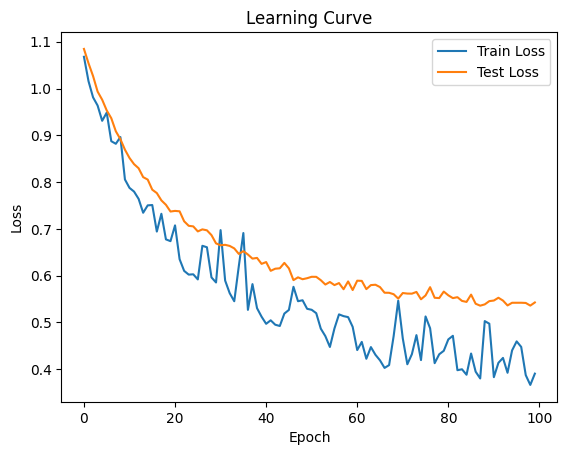

In [51]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        sample = self.X[idx]
        label = self.y[idx]
        return sample, label

train_dataset = CustomDataset(X_train_processed, y_train_encoded)
test_dataset = CustomDataset(X_test_processed, y_test_encoded)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)


import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

input_size = X_train_processed.shape[1]
num_classes = len(np.unique(y_train_encoded))
model = SimpleNN(input_size, num_classes)



criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for features, labels in train_loader:
            outputs = model(features)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Calculate test loss
        model.eval()
        test_running_loss = 0.0
        with torch.no_grad():
            for features, labels in test_loader:
                outputs = model(features)
                loss = criterion(outputs, labels)
                test_running_loss += loss.item()

        test_loss = test_running_loss / len(test_loader)
        test_losses.append(test_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    return train_losses, test_losses

def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in dataloader:
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy




num_epochs = 100
train_losses, test_losses = train_model(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs)

train_accuracy = evaluate_model(model, train_dataloader)
test_accuracy = evaluate_model(model, test_dataloader)

print(f'Accuracy of the model on the training set: {train_accuracy * 100:.2f}%')
print(f'Accuracy of the model on the test set: {test_accuracy * 100:.2f}%')

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()


Epoch [1/100], Train Loss: 1.0685, Test Loss: 1.0417
Epoch [2/100], Train Loss: 1.0364, Test Loss: 1.0083
Epoch [3/100], Train Loss: 0.9768, Test Loss: 0.9720
Epoch [4/100], Train Loss: 0.9390, Test Loss: 0.9379
Epoch [5/100], Train Loss: 0.9080, Test Loss: 0.9040
Epoch [6/100], Train Loss: 0.8430, Test Loss: 0.8732
Epoch [7/100], Train Loss: 0.8370, Test Loss: 0.8388
Epoch [8/100], Train Loss: 0.7692, Test Loss: 0.8050
Epoch [9/100], Train Loss: 0.7343, Test Loss: 0.7703
Epoch [10/100], Train Loss: 0.7305, Test Loss: 0.7333
Epoch [11/100], Train Loss: 0.6638, Test Loss: 0.7120
Epoch [12/100], Train Loss: 0.6316, Test Loss: 0.6683
Epoch [13/100], Train Loss: 0.5831, Test Loss: 0.6521
Epoch [14/100], Train Loss: 0.5424, Test Loss: 0.6154
Epoch [15/100], Train Loss: 0.5323, Test Loss: 0.5933
Epoch [16/100], Train Loss: 0.5103, Test Loss: 0.5741
Epoch [17/100], Train Loss: 0.4443, Test Loss: 0.5500
Epoch [18/100], Train Loss: 0.4447, Test Loss: 0.5345
Epoch [19/100], Train Loss: 0.4966, T

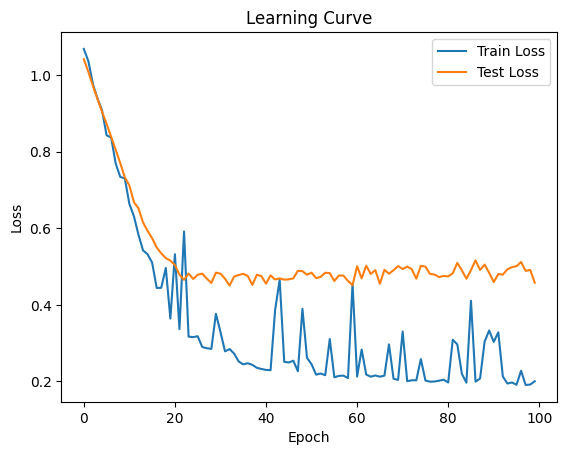

In [54]:
import torch.nn as nn
import torch.optim as optim

class SimpleNNWithHiddenLayer(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNNWithHiddenLayer, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.hidden(x)
        out = self.relu(out)
        out = self.output(out)
        return out

input_size = X_train_processed.shape[1]
hidden_size = 50  # Adjust this size as needed
num_classes = len(np.unique(y_train_encoded))
model = SimpleNNWithHiddenLayer(input_size, hidden_size, num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for features, labels in train_loader:
            outputs = model(features)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Calculate test loss
        model.eval()
        test_running_loss = 0.0
        with torch.no_grad():
            for features, labels in test_loader:
                outputs = model(features)
                loss = criterion(outputs, labels)
                test_running_loss += loss.item()

        test_loss = test_running_loss / len(test_loader)
        test_losses.append(test_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    return train_losses, test_losses

def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in dataloader:
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy



num_epochs = 100
train_losses, test_losses = train_model(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs)

train_accuracy = evaluate_model(model, train_dataloader)
test_accuracy = evaluate_model(model, test_dataloader)

print(f'Accuracy of the model on the training set: {train_accuracy * 100:.2f}%')
print(f'Accuracy of the model on the test set: {test_accuracy * 100:.2f}%')

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()


Epoch [1/100], Train Loss: 1.0691, Test Loss: 1.0534
Epoch [2/100], Train Loss: 1.0285, Test Loss: 1.0196
Epoch [3/100], Train Loss: 1.0095, Test Loss: 0.9755
Epoch [4/100], Train Loss: 0.9468, Test Loss: 0.9204
Epoch [5/100], Train Loss: 0.8879, Test Loss: 0.8408
Epoch [6/100], Train Loss: 0.8208, Test Loss: 0.7435
Epoch [7/100], Train Loss: 0.7817, Test Loss: 0.6565
Epoch [8/100], Train Loss: 0.5989, Test Loss: 0.5713
Epoch [9/100], Train Loss: 0.4807, Test Loss: 0.5390
Epoch [10/100], Train Loss: 0.4198, Test Loss: 0.5080
Epoch [11/100], Train Loss: 0.3687, Test Loss: 0.5590
Epoch [12/100], Train Loss: 0.4886, Test Loss: 0.5580
Epoch [13/100], Train Loss: 0.4795, Test Loss: 0.5616
Epoch [14/100], Train Loss: 0.4444, Test Loss: 0.5166
Epoch [15/100], Train Loss: 0.2995, Test Loss: 0.5218
Epoch [16/100], Train Loss: 0.2562, Test Loss: 0.4961
Epoch [17/100], Train Loss: 0.2728, Test Loss: 0.5210
Epoch [18/100], Train Loss: 0.2405, Test Loss: 0.4782
Epoch [19/100], Train Loss: 0.2220, T

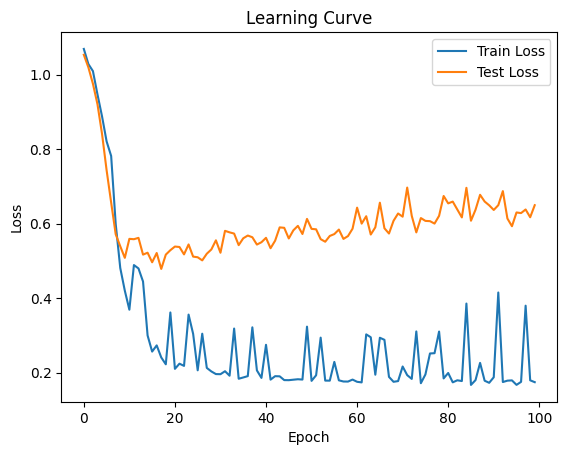

In [61]:
import torch.nn as nn
import torch.optim as optim

class ComplexNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super(ComplexNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.hidden3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size3, num_classes)

    def forward(self, x):
        out = self.hidden1(x)
        out = self.relu(out)
        out = self.hidden2(out)
        out = self.relu(out)
        out = self.hidden3(out)
        out = self.relu(out)
        out = self.output(out)
        return out

input_size = X_train_processed.shape[1]
hidden_size1 = 128
hidden_size2 = 64
hidden_size3 = 32
num_classes = len(np.unique(y_train_encoded))
model = ComplexNN(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for features, labels in train_loader:
            outputs = model(features)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Calculate test loss
        model.eval()
        test_running_loss = 0.0
        with torch.no_grad():
            for features, labels in test_loader:
                outputs = model(features)
                loss = criterion(outputs, labels)
                test_running_loss += loss.item()

        test_loss = test_running_loss / len(test_loader)
        test_losses.append(test_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    return train_losses, test_losses

def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in dataloader:
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy
num_epochs = 100
train_losses, test_losses = train_model(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs)

train_accuracy = evaluate_model(model, train_dataloader)
test_accuracy = evaluate_model(model, test_dataloader)

print(f'Accuracy of the model on the training set: {train_accuracy * 100:.2f}%')
print(f'Accuracy of the model on the test set: {test_accuracy * 100:.2f}%')

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()
